# Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

%matplotlib inline

In [2]:
data = pd.read_csv('./data/merged_tracks.csv')
df = pd.DataFrame(data = data)
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4
1,David Bowie,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.14200,0.000010,0.0449,0.321,152.531,283753,3
2,Kendrick Lamar,Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,0.07030,0.000000,0.2240,0.344,71.994,386907,4
3,Electro Dark Project,Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,0.00419,0.000031,0.1230,0.542,164.092,214164,4
4,Chief Keef,Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,0.03610,0.000000,0.1110,0.211,131.965,246213,4


In [3]:
df['dance_valence'] = df['danceability'] * df['valence']
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dance_valence
0,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4,0.453761
1,David Bowie,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.14200,0.000010,0.0449,0.321,152.531,283753,3,0.147660
2,Kendrick Lamar,Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,0.07030,0.000000,0.2240,0.344,71.994,386907,4,0.246304
3,Electro Dark Project,Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,0.00419,0.000031,0.1230,0.542,164.092,214164,4,0.271542
4,Chief Keef,Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,0.03610,0.000000,0.1110,0.211,131.965,246213,4,0.162892


In [4]:
X = df[['dance_valence', 'popularity']]

In [5]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 4, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [6]:
df['cluster'] = km.labels_
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dance_valence,cluster
0,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4,0.453761,0
1,David Bowie,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.14200,0.000010,0.0449,0.321,152.531,283753,3,0.147660,3
2,Kendrick Lamar,Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,0.07030,0.000000,0.2240,0.344,71.994,386907,4,0.246304,3
3,Electro Dark Project,Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,0.00419,0.000031,0.1230,0.542,164.092,214164,4,0.271542,1
4,Chief Keef,Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,0.03610,0.000000,0.1110,0.211,131.965,246213,4,0.162892,3


In [7]:
df.cluster.value_counts(normalize = True)

3    0.335393
1    0.289146
0    0.206917
2    0.168544
Name: cluster, dtype: float64

In [8]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[ 0.51099233, 70.57225434],
       [ 0.16666414, 11.39406487],
       [ 0.48920347, 10.2987013 ],
       [ 0.19336777, 69.9922734 ]])

In [9]:
centroids = pd.DataFrame(centroids, columns = ['dance_valence', 'popularity'])
centroids

,dance_valence,popularity
0,0.510992,70.572254
1,0.166664,11.394065
2,0.489203,10.298701
3,0.193368,69.992273


<Figure size 720x576 with 0 Axes>

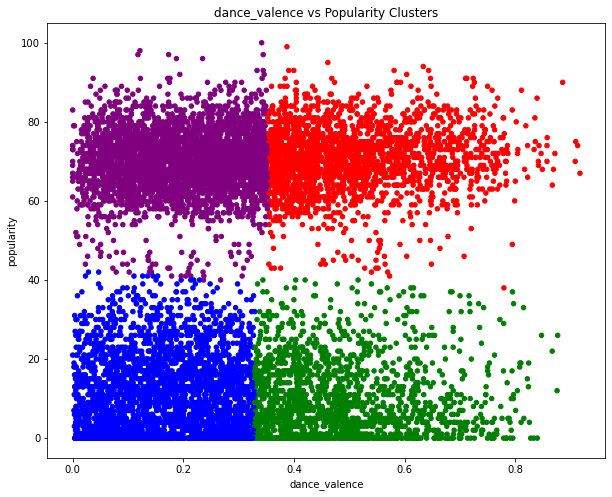

In [10]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green', 'purple'] #, 'green', 'purple']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'dance_valence', y = 'popularity',
    figsize=(10,8),c = df['color'])

centroids.plot(kind='scatter', x = 'dance_valence', y = 'popularity', 
    marker='*', c=colors, s=550, ax=ax)

plt.title('dance_valence vs Popularity Clusters')
plt.xlabel('dance_valence')
plt.ylabel('popularity');

Text(0.5, 1.0, 'Inertia Scores')

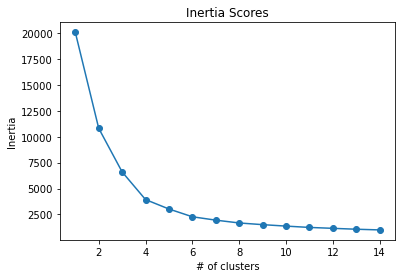

In [11]:
inertia_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,15), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

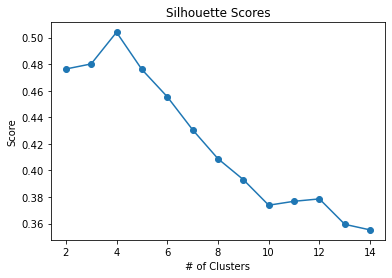

In [12]:
silhouette_list = []

for k in range(2,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 15), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

## DBSCAN

In [13]:
dbscan = DBSCAN(eps = 0.18)
dbscan.fit(X_scaled)

DBSCAN(eps=0.18)

In [14]:
pd.Series(dbscan.labels_).unique()

array([ 0, -1], dtype=int64)

In [15]:
silhouette_score(X_scaled, dbscan.labels_)

0.341986776714218

In [16]:
df['cluster'] = dbscan.labels_

df.cluster.value_counts(normalize = True)

 0    0.997309
-1    0.002691
Name: cluster, dtype: float64

<Figure size 720x576 with 0 Axes>

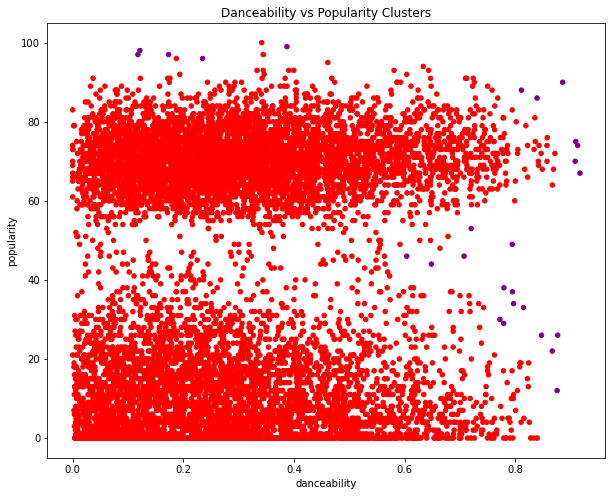

In [17]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green', 'purple']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'dance_valence', y = 'popularity',
    figsize=(10,8),c = df['color'])

plt.title('Danceability vs Popularity Clusters')
plt.xlabel('danceability')
plt.ylabel('popularity');

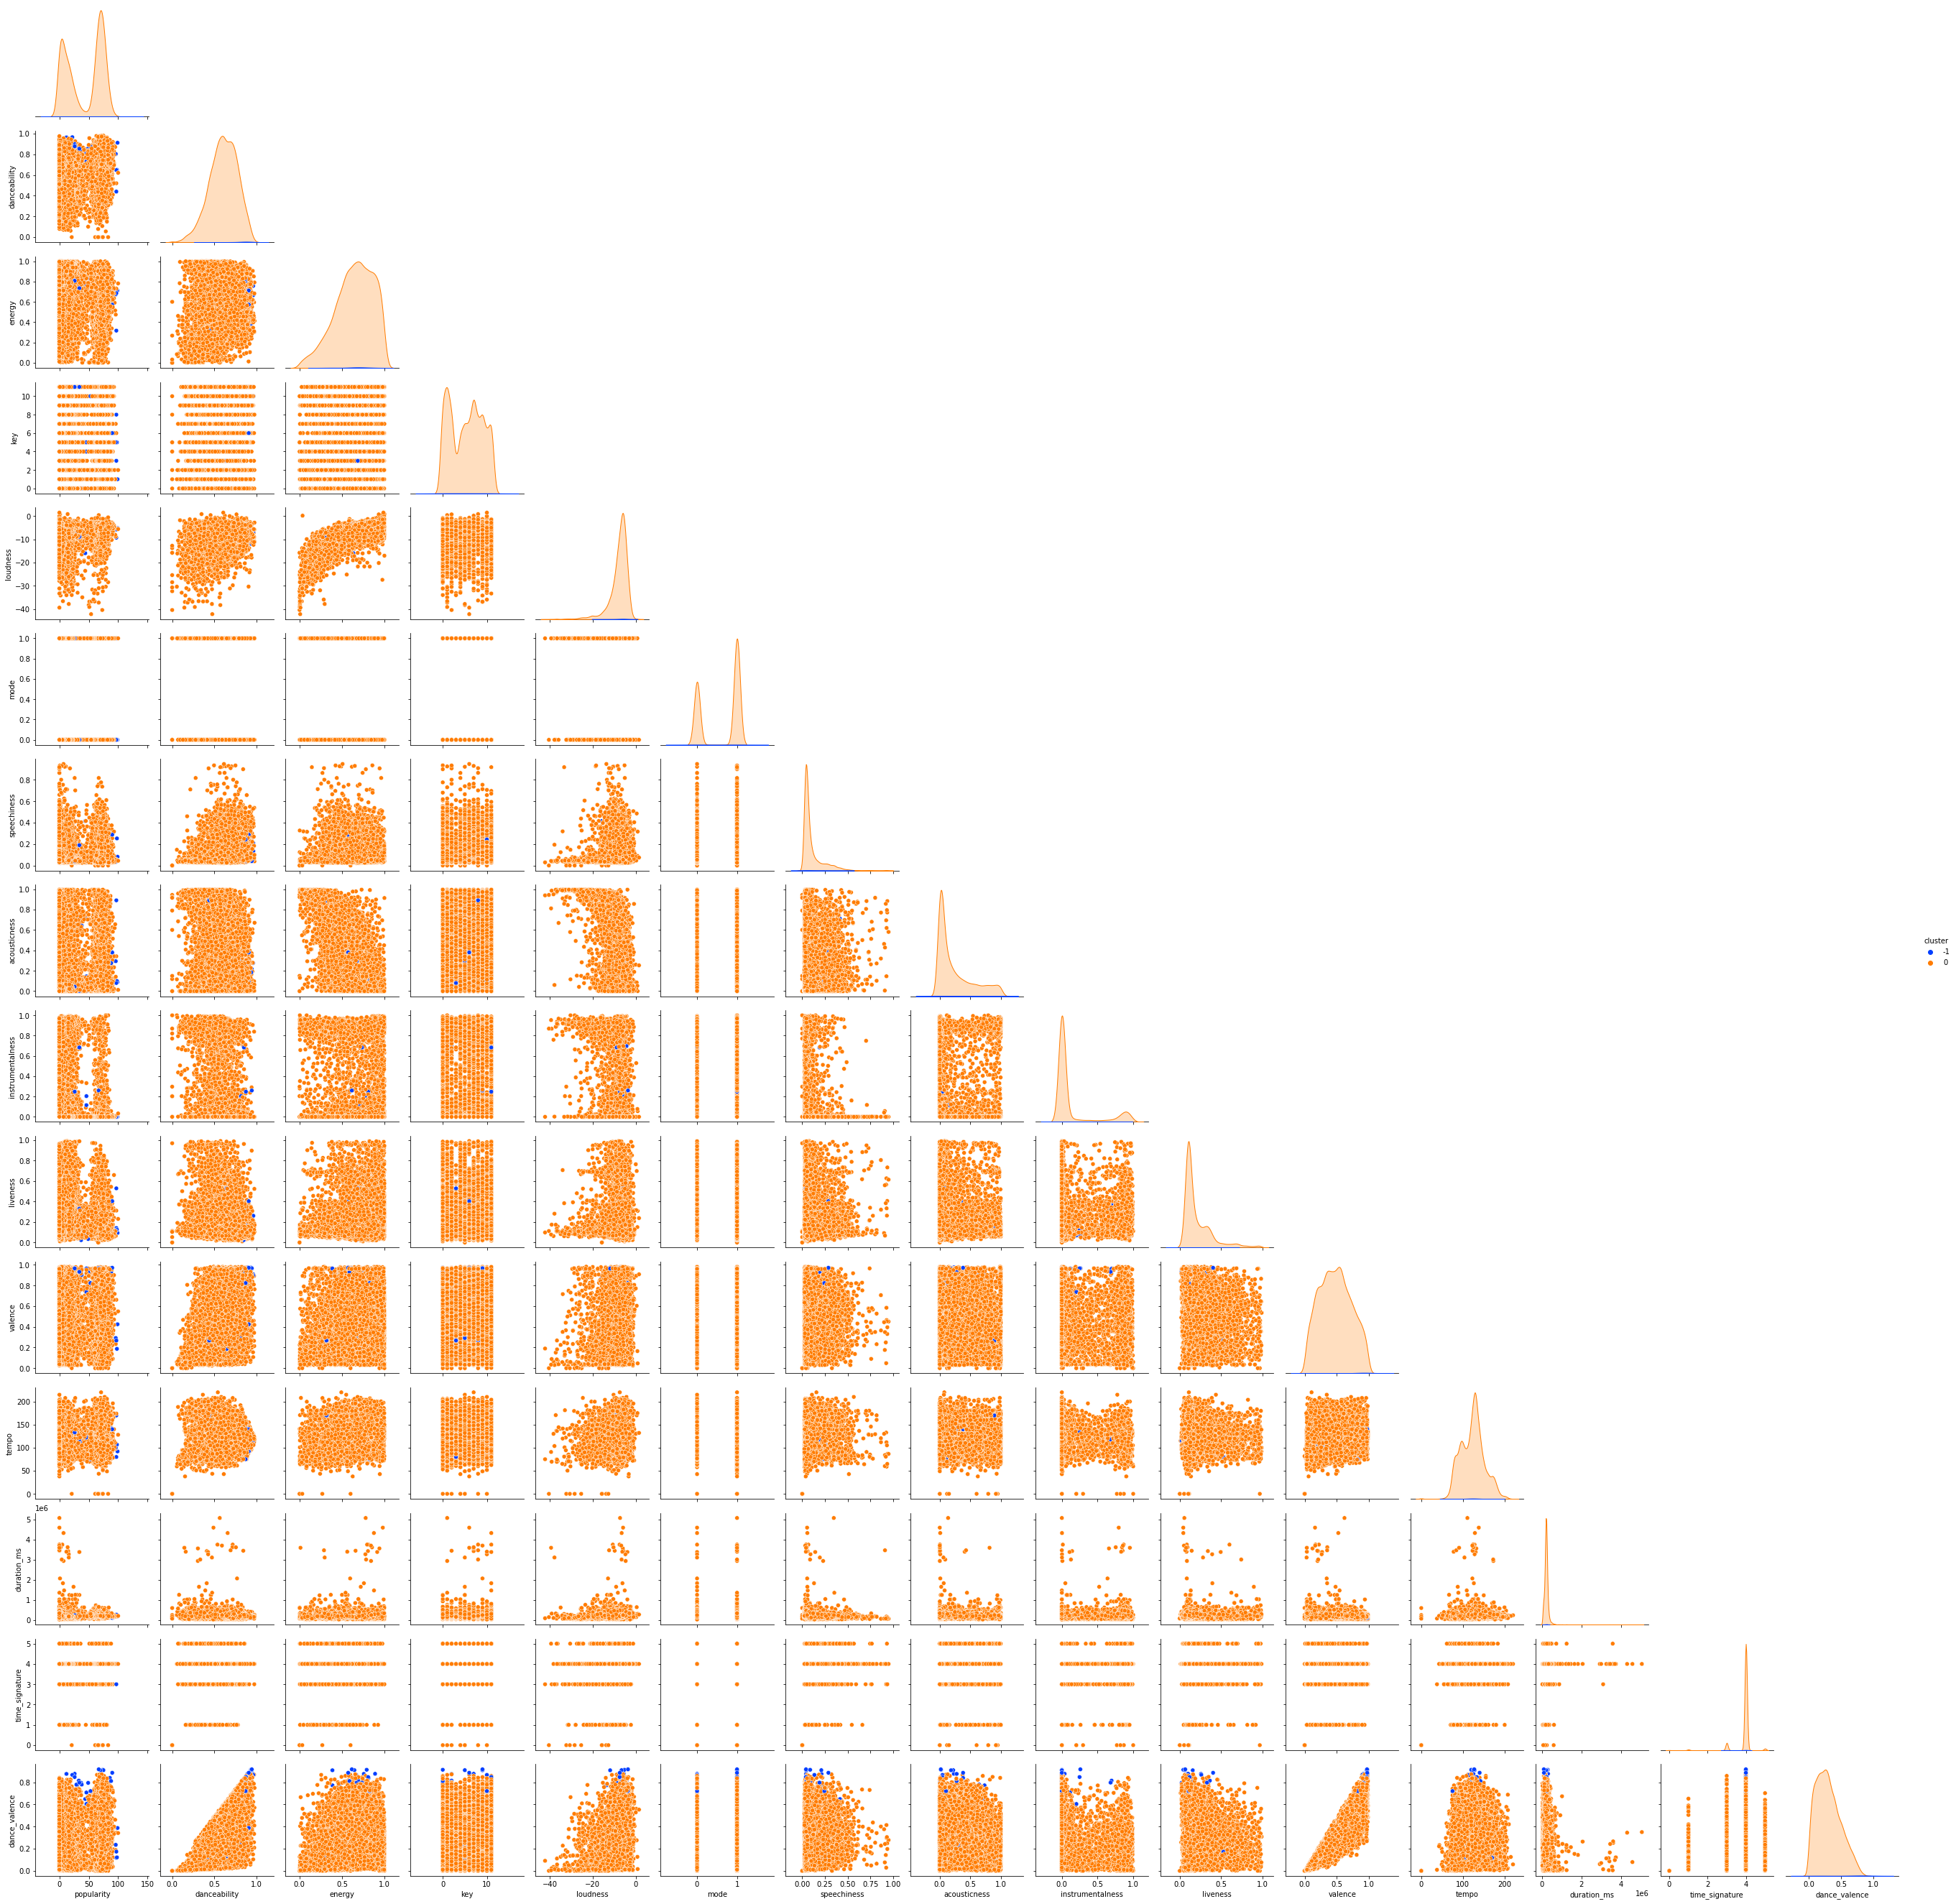

In [18]:
sns.pairplot(df, hue = 'cluster', palette = 'bright', corner = True);